# Classification by Neural Network

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [12]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Problem 1

Consider the data and new observations below.  Construct a 1-layer (no hidden nodes) neural network model based on the data, and use it to classify the new observations, assuming cutoff for A is 0.5.  Use the perceptron method with initial weights $w0=1$, $w1=1$, $w2=1$ to find the final weights.  Note, the number of iterations necessary to stablize the weights may vary depending on how you randomize the order of observations.

data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 0 
 0 
 A 
 
 
 1 
 0 
 B 
 
 
 2 
 1 
 A 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 1 
 0.1 
 
 
 1 
 0.6

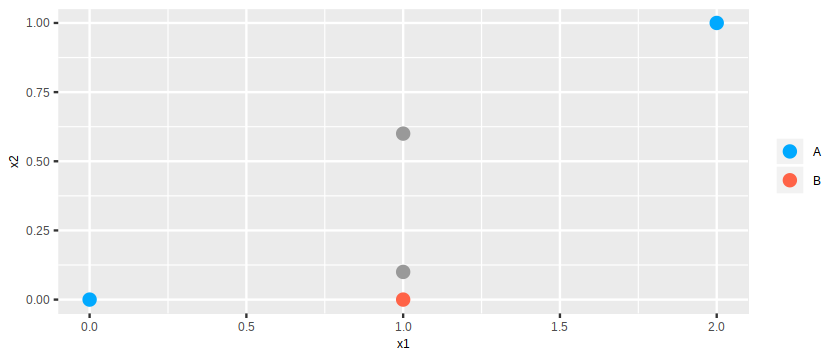

In [13]:
data = data.frame(x1=c(0,1,2), x2=c(0,0,1), class=c("A", "B", "A"))
new = data.frame(x1=c(1,1), x2=c(0.1,0.6))

layout(fmt(data), fmt(new))
ggplot(data) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR)

In [14]:
# Configure & initialize perceptron method
cutoff.A = 0.5
iteration = 0
status = data.frame(iteration, x1=data$x1, x2=data$x2, class=data$class, class.bin=as.binary(data$class, "A"), w0=NA, w1=NA, w2=NA, output=NA, error=NA, cutoff.A, class.bin.predicted=NA)
w0.current = 1; w1.current = 1; w2.current = 1

data.frame(w0.current, w1.current, w2.current)
status

w0.current,w1.current,w2.current
1,1,1


iteration,x1,x2,class,class.bin,w0,w1,w2,output,error,cutoff.A,class.bin.predicted
0,0,0,A,1,NA,NA,NA,NA,NA,0.5,NA
0,1,0,B,0,NA,NA,NA,NA,NA,0.5,NA
0,2,1,A,1,NA,NA,NA,NA,NA,0.5,NA


In [15]:
set.seed(0)

In [16]:
# Iterate perceptron method
status = status[sample(nrow(status)),]
for (obs in 1:3) {
    status$w0[obs] = w0.current; status$w1[obs] = w1.current; status$w2[obs] = w2.current
    status$output[obs] = sigmoid(status$w0[obs] + status$w1[obs]*status$x1[obs] + status$w2[obs]*status$x2[obs])
    status$error[obs] = status$class.bin[obs] - status$output[obs]
    status$class.bin.predicted[obs] = as.numeric(status$output[obs] >= cutoff.A)
    if (status$class.bin.predicted[obs] != status$class.bin[obs]) {
        w0.current = status$w0[obs] + status$error[obs]
        w1.current = status$w1[obs] + status$error[obs]*status$x1[obs]
        w2.current = status$w2[obs] + status$error[obs]*status$x2[obs] 
    }
}
status

,iteration,x1,x2,class,class.bin,w0,w1,w2,output,error,cutoff.A,class.bin.predicted
2,0,1,0,B,0,1.0000000,1.0000000,1,0.8807971,-0.8807971,0.5,1
1,0,0,0,A,1,0.1192029,0.1192029,1,0.5297655,0.4702345,0.5,1
3,0,2,1,A,1,0.1192029,0.1192029,1,0.7953708,0.2046292,0.5,1


In [17]:
data.frame(w0.current, w1.current, w2.current)

w0.current,w1.current,w2.current
0.1192029,0.1192029,1


In [18]:
output = sigmoid(w0.current + w1.current*new$x1 + w2.current*new$x2)
class.predicted = as.class(data.frame("A"=output, "B"=1-output), "A", cutoff.A)
                           
data.frame(x1=new$x1, x2=new$x2, output, cutoff.A, class.predicted)

x1,x2,output,cutoff.A,class.predicted
1,0.1,0.5838032,0.5,A
1,0.6,0.6981294,0.5,A


## Problem 2

Consider the data and new observations below.

data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 9 
 A 
 
 
 2 
 7 
 B 
 
 
 3 
 6 
 A 
 
 
 2 
 5 
 B 
 
 
 1 
 6 
 A 
 
 
 4 
 3 
 B 
 
 
 6 
 2 
 A 
 
 
 5 
 1 
 B 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 1 
 7 
 
 
 5 
 2 
 
 
 2 
 6 
 
 
 6 
 3

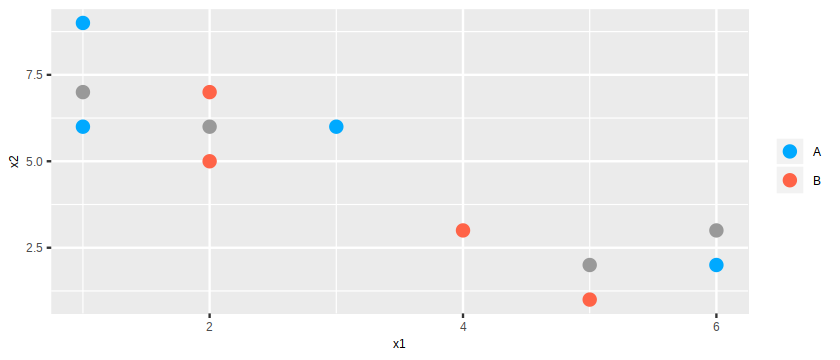

In [19]:
data = data.frame(x1=c(1,2,3,2,1,4,6,5), x2=c(9,7,6,5,6,3,2,1), class=c("A", "B", "A", "B", "A", "B", "A", "B"))
new = data.frame(x1=c(1,5,2,6), x2=c(7,2,6,3))

layout(fmt(data), fmt(new))
ggplot(data) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new, color=NEW_COLOR)

Here is a 2-layer (1 hidden layer) neural network model constructed from the data using a sigmoid activation function. 

[[1]]
           [,1]       [,2]
[1,] -6.8863228  0.9163646
[2,] -0.8752118  6.2842984
[3,]  9.4356764 -1.3631269

[[2]]
           [,1]
[1,] -0.2989332
[2,]  3.1205953
[3,] -3.2023208

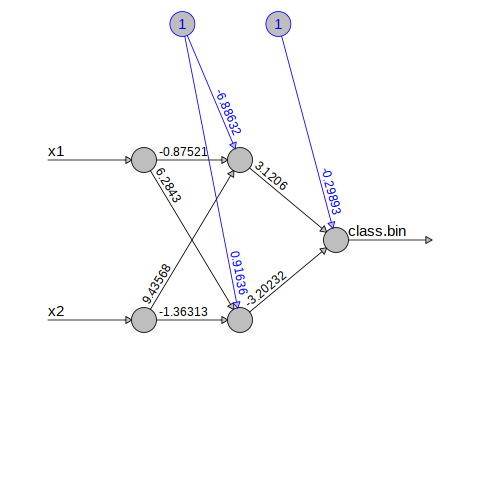

In [20]:
set.seed(0)

data$class.bin = as.binary(data$class, "A")
model = neuralnet(class.bin ~ x1+x2, data, hidden=2, algorithm="rprop+", act.fct="logistic", linear.output=FALSE, rep=1)
w = model$weights[[1]]

w
output_size(4, 4)
plot(model, rep=1, fill="gray", show.weights=TRUE, information=FALSE, cex=0.7, lwd=0.5)
output_size(restore)

Here is how to access the weights. 

In [21]:
w[[1]][1,1]
w[[1]][2,1]
w[[1]][3,1]
w[[1]][1,2]
w[[1]][2,2]
w[[1]][3,2]
w[[2]][1,1]
w[[2]][2,1]
w[[2]][3,1]

[1] -6.886323

[1] -0.8752118

[1] 9.435676

[1] 0.9163646

[1] 6.284298

[1] -1.363127

[1] -0.2989332

[1] 3.120595

[1] -3.202321

Use the neural network model to classify the new observations, assuming cutoff for A is 0.5.  Show the outputs of the hidden nodes and the output node.  Note, you will have to compute the output for each node separately based on relevant inputs, weights, and activation function. 

In [22]:
full.output = compute(model, new, rep=1)
h1 = full.output$neurons[[2]][,2]
h2 = full.output$neurons[[2]][,3]
out = full.output$net.result
class.predicted = as.class(data.frame("A"=out, "B"=1-out), "A", cutoff.A)

prob2.df = data.frame(x1=new$x1, x2=new$x2, h1, h2, out, class.predicted)
prob2.df

x1,x2,h1,h2,out,class.predicted
1,7,1.0000000,0.08776575,0.9269400,A
5,2,0.9995043,1.00000000,0.4055950,B
2,6,1.0000000,0.99506374,0.4097857,B
6,3,0.9999999,1.00000000,0.4059680,B


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised March 30, 2020
</span>
</p>
</font>